### Video 2 - exercise on decision analysis

From video - https://www.youtube.com/watch?v=mAUwjSo5TJE

This follows from the exercise on XY or AB testing.

Suppose that in addition to X, Y, there are different profits

Again, we have:

X: 6/16 via pamphlet in post

Y: 10/16 via salmon and pamphlet in post

This time, we learn:

X: costs $30

Y: costs $300

a subscription means we earn $1000

In [5]:
n_draw <- 1000000

# We need two different priors
priorX <- runif(n_draw, 0, 1)
priorY <- runif(n_draw, 0, 1)

In [6]:
# The process is unchanged until we interpret the posterior distributions

gen_model <- function(rate) {
  subscribers = rbinom(n = 1, size = 16, prob = rate)
  (subscribers)
}

subscribersX <- rep(NA, n_draw)
for(i in 1:n_draw) {
  subscribersX[i] <- gen_model(priorX[i])
}
subscribersY <- rep(NA, n_draw)
for(i in 1:n_draw) {
  subscribersY[i] <- gen_model(priorY[i])
}

# Now, we only keep both priors if both match the observed data
observedX <- 6
observedY <- 10
posteriorX <- c()
posteriorY <- c()
for (i in 1:n_draw) {
    if(subscribersX[i] == observedX &&
       subscribersY[i] == observedY) {
        posteriorX <- c(posteriorX, priorX[i])
        posteriorY <- c(posteriorY, priorY[i])
    }
}

Now we introduce the costs to each posterior

In [3]:
profitDistX = posteriorX * 1000 - 30
profitDistY = posteriorY * 1000 - 300

Now, the difference should give us an idea about which method is better.

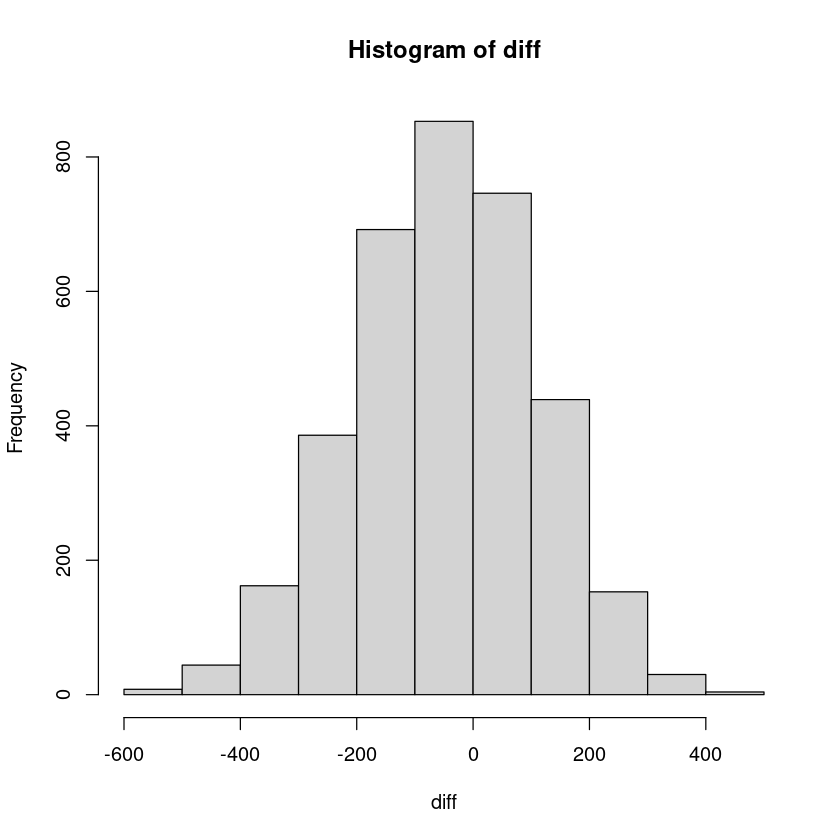

In [4]:
diff = profitDistY - profitDistX
hist(diff)

This reveals that we expect to lose money from the second method, because of the costs of sending a salmon. But there is a lot of uncertainty in the distribution. More data would assist in making the decision.